# Modelo 1


&nbsp;&nbsp;&nbsp;&nbsp;O modelo utiliza o algoritmo XGBoost (eXtreme Gradient Boosting), uma técnica de aprendizado supervisionado reconhecida pela sua eficiência e performance, especialmente em problemas de grande escala e com dados estruturados. O XGBoost pertence à classe dos métodos de boosting, que consiste em combinar árvores de decisão fracas de forma sequencial, em que cada nova árvore tenta corrigir os erros cometidos pelas anteriores. Isso permite que o modelo aprenda com seus próprios erros de forma a aumentar progressivamente a precisão das previsões.


&nbsp;&nbsp;&nbsp;&nbsp;Uma característica do XGBoost é a implementação de técnicas de regularização, que controlam a complexidade do modelo e ajudam a evitar o overfitting — um problema comum em modelos complexos que ajustam-se muito aos dados de treinamento, comprometendo sua capacidade de generalização em novos dados.


&nbsp;&nbsp;&nbsp;&nbsp;O XGBoost é otimizado para utilizar paralelização, o que acelera o treinamento em grandes volumes de dados. Essa característica é muito útil quando o tempo de processamento se torna uma preocupação. Além disso, o XGBoost é projetado para lidar com dados esparsos e valores ausentes, sendo capaz de tratá-los automaticamente, o que dispensa a necessidade de pré-processamento detalhado.


In [ ]:
!pip install xgboost
!pip install notebook pandas seaborn scikit-learn

## Importação das Bibliotecas

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor

from math import sqrt

## Importação do Dataset


## Uso do gdown

Utilizamos a biblioteca `gdown` para facilitar o download de arquivos diretamente do Google Drive. A `gdown` é uma ferramenta útil para acessar e baixar arquivos compartilhados no Google Drive, especialmente quando precisamos integrar esses dados em nossos notebooks Jupyter.

### Variáveis Utilizadas

- **file_id**: Um identificador único para o arquivo no Google Drive. No nosso caso, o valor é `'1BeB7U-Y-wN5L5XnSw-QIpph4MXd93g0V'`.
- **url**: A URL gerada a partir do `file_id` para acessar o arquivo diretamente. A URL completa é `'https://drive.google.com/uc?id=1BeB7U-Y-wN5L5XnSw-QIpph4MXd93g0V'`.

### Processo de Download

Utilizamos o `gdown` para baixar o arquivo CSV necessário para a análise e modelagem. O comando `gdown.download(url, 'df_final_novas_features2.csv', quiet=False)` baixa o arquivo e o salva localmente com o nome `df_final_novas_features2.csv`.

### Vantagens

- **Facilidade de Uso**: Simplifica o processo de download de arquivos do Google Drive.
- **Integração**: Permite a integração direta de dados armazenados no Google Drive em notebooks Jupyter.
- **Automatização**: Facilita a automação do processo de download, garantindo que os dados estejam sempre atualizados e disponíveis para análise.

O uso do `gdown` neste projeto garante que os dados necessários estejam prontamente disponíveis para as etapas subsequentes de processamento, análise e modelagem.


In [ ]:
# baixando o gdown para baixar o arquivo de dados

!pip install gdown

In [ ]:
import gdown

file_id = '1BeB7U-Y-wN5L5XnSw-QIpph4MXd93g0V'
url = f'https://drive.google.com/uc?id={file_id}'


# Baixar o arquivo
gdown.download(url, 'df_final_novas_features2.csv', quiet=False)

In [4]:
df_final = pd.read_csv('df_final_novas_features2.csv')

In [5]:
df_final.head()

,Unnamed: 0,year,month,Setor,Origem,Veiculo,Vl Liquido Final,"PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)"
0,0,2020,1,2,1,13,908.16,1.8
1,1,2020,1,2,5,4,200.00,1.8
2,2,2020,1,2,5,6,293.56,1.8
3,3,2020,1,2,5,7,286.12,1.8
4,4,2020,1,2,5,8,241.44,1.8


In [6]:
df_final = df_final.drop(['Unnamed: 0', 'PMC - Variação mês/mês imediatamente anterior, com ajuste sazonal (M/M-1) (%)'], axis=1)
df_final

,year,month,Setor,Origem,Veiculo,Vl Liquido Final
0,2020,1,2,1,13,908.16
1,2020,1,2,5,4,200.00
2,2020,1,2,5,6,293.56
3,2020,1,2,5,7,286.12
4,2020,1,2,5,8,241.44
...,...,...,...,...,...,...
17592,2024,4,73,5,4,1584.00
17593,2024,4,73,5,5,10600.00
17594,2024,4,73,5,12,2373.00
17595,2024,4,74,4,5,2613.39


In [7]:
df_final.corr()

,year,month,Setor,Origem,Veiculo,Vl Liquido Final
year,1.000000,-0.180937,-0.021606,-0.013890,-0.007077,0.015816
month,-0.180937,1.000000,-0.021333,-0.015816,0.015152,0.017510
Setor,-0.021606,-0.021333,1.000000,0.027724,-0.035899,0.041418
Origem,-0.013890,-0.015816,0.027724,1.000000,-0.267416,0.088693
Veiculo,-0.007077,0.015152,-0.035899,-0.267416,1.000000,0.101286
Vl Liquido Final,0.015816,0.017510,0.041418,0.088693,0.101286,1.000000


In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17597 entries, 0 to 17596
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              17597 non-null  int64  
 1   month             17597 non-null  int64  
 2   Setor             17597 non-null  int64  
 3   Origem            17597 non-null  int64  
 4   Veiculo           17597 non-null  int64  
 5   Vl Liquido Final  17597 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 825.0 KB


##Separação das variáveis em treino e teste

In [9]:
X = df_final.drop('Vl Liquido Final', axis=1)
y = df_final['Vl Liquido Final']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Função para execução do MAPE

## Criação do modelo

In [10]:
xgb_model = XGBRegressor(objective= 'reg:squarederror',
                         booster= 'gbtree',
                         device= 'cpu',
                         n_jobs= 1,
                         random_state= 12,
                         tree_method= 'auto',
                         verbosity= 0)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=1,
             num_parallel_tree=None, random_state=12, ...)

## Previsão

In [11]:
y_pred = xgb_model.predict(X_test)

In [12]:
print(y_pred)

[ 17632.549    4817.0854   3594.0044 ... -11006.606    8418.855
  -2293.9685]


## Métricas


&nbsp;&nbsp;&nbsp;&nbsp;Após o treinamento do modelo, são utilizadas métricas para avaliar seu desempenho. O Mean Squared Error (MSE) mede o erro quadrático médio, fornecendo uma indicação da distância entre as previsões e os valores reais. Um MSE baixo sugere que as previsões são bastante precisas. O Mean Absolute Error (MAE) complementa essa métrica ao medir a magnitude média dos erros absolutos. Além disso, o Coeficiente de Determinação (R²) quantifica a proporção da variância explicada pelo modelo; valores de R² próximos a 1 indicam que o modelo captura bem as variações dos dados. O Root Mean Squared Error (RMSE), que é a raiz quadrada do MSE, é frequentemente usado para interpretar o erro na mesma unidade dos dados originais, facilitando sua compreensão. Finalmente, o Mean Absolute Percentage Error (MAPE) fornece uma visão percentual do erro, facilitando a análise de quão distantes estão as previsões em relação aos valores reais.


In [13]:
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

rmse = sqrt(mse)

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")

R²: 0.91
MAE: 11469.07
MSE: 1161310398.98
RMSE: 34078.00
MAPE: 6.61


## Gráficos de compração entre valores

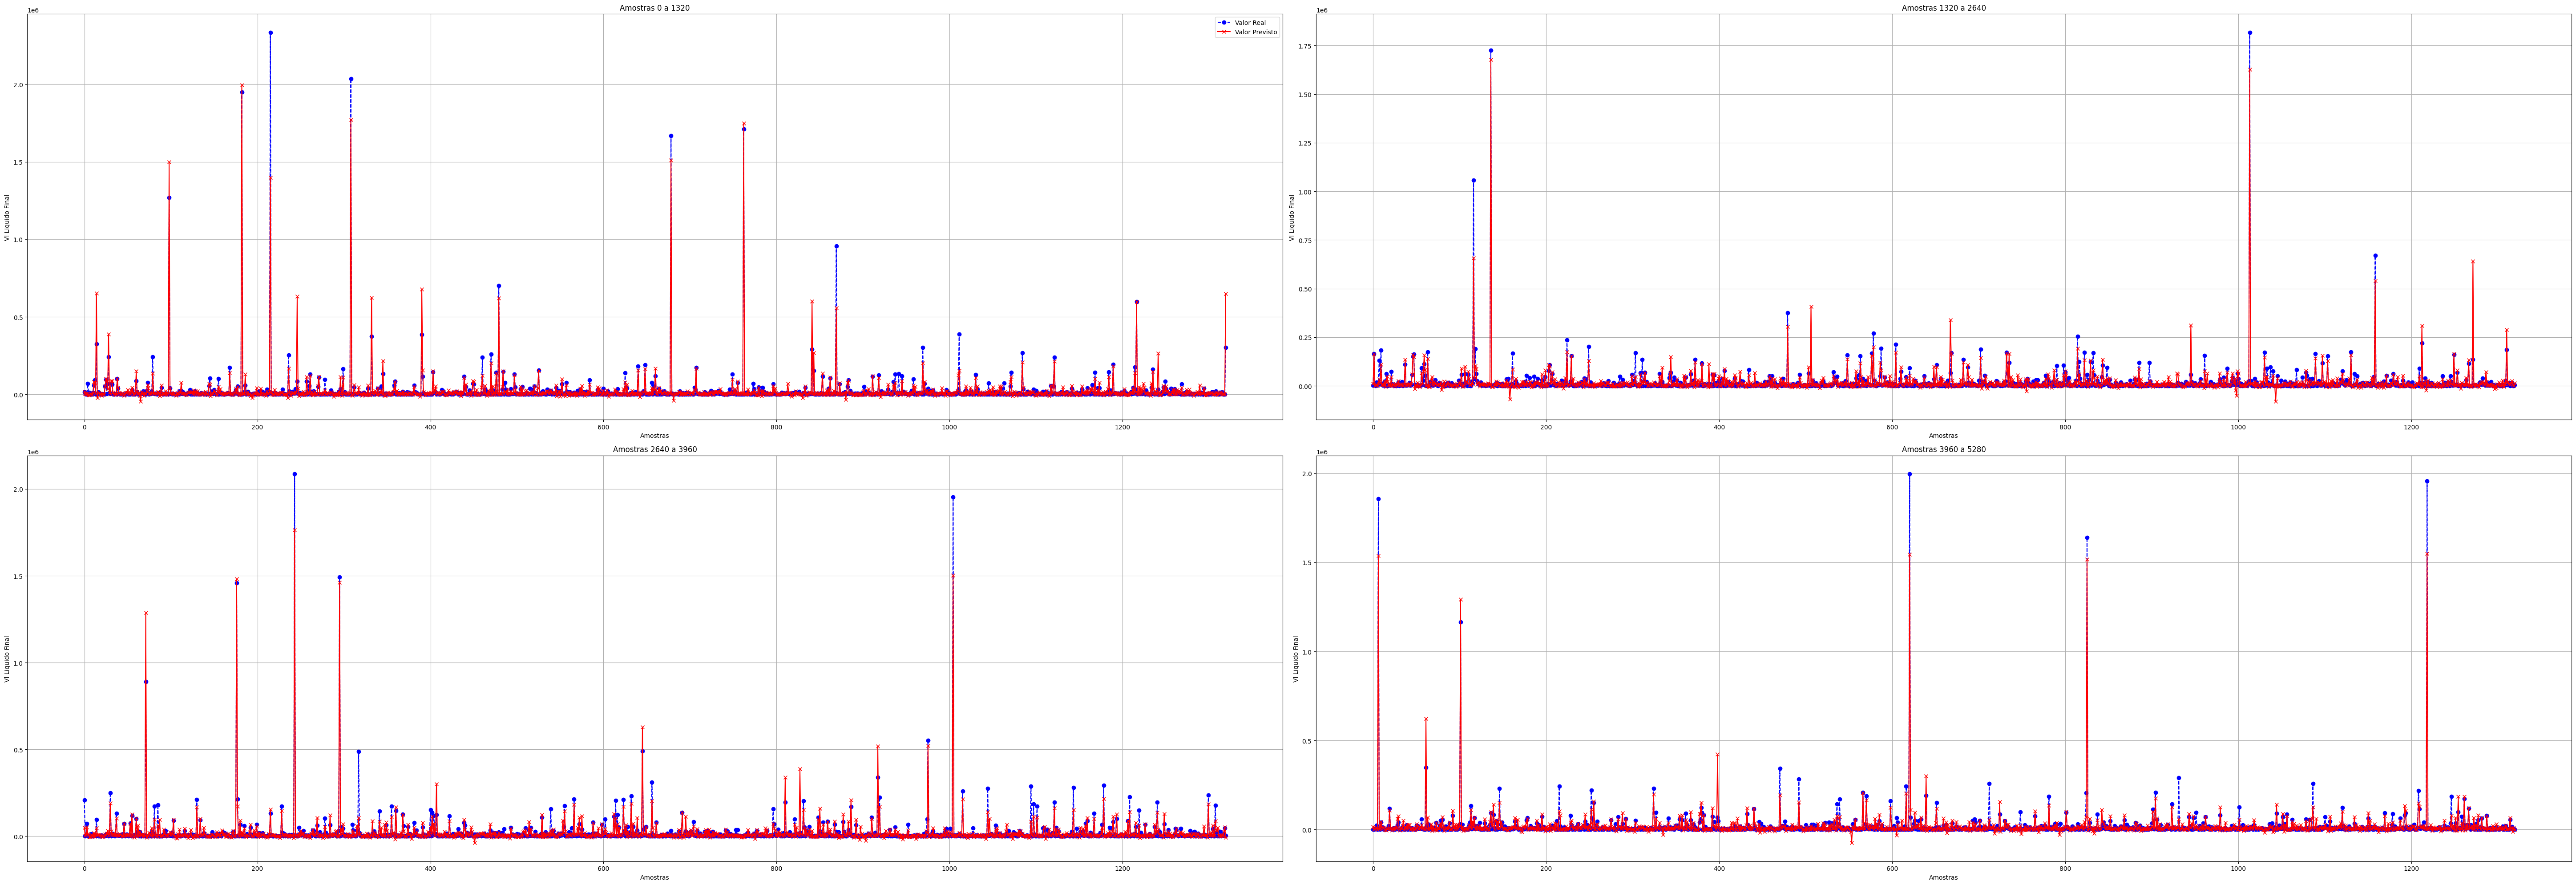

In [14]:
import matplotlib.pyplot as plt

# Número de amostras a serem divididas
n_amostras = len(y_test)

# Índices para dividir o gráfico em 4 partes
indices = np.linspace(0, n_amostras, 5, dtype=int)

# Criando subplots
fig, axs = plt.subplots(2, 2, figsize=(58, 20))

for i in range(4):
    inicio, fim = indices[i], indices[i+1]

    ax = axs[i//2, i%2]

    # Plotando valores reais e previstos para cada parte
    ax.plot(y_test.values[inicio:fim], label='Valor Real', marker='o', linestyle='--', color='blue')
    ax.plot(y_pred[inicio:fim], label='Valor Previsto', marker='x', linestyle='-', color='red')

    # Configurações do gráfico
    ax.set_title(f'Amostras {inicio} a {fim}')
    ax.set_xlabel('Amostras')
    ax.set_ylabel('Vl Liquido Final')
    ax.grid(True)

# Exibir a legenda no último subplot
axs[0, 0].legend()

# Ajustar layout
plt.tight_layout()
plt.show()


&nbsp;&nbsp;&nbsp;&nbsp;Os pontos positivos do XGBoost incluem sua capacidade de gerar previsões precisas, mesmo em grandes conjuntos de dados, e a robustez de seu processo de regularização, que minimiza o risco de overfitting. Além disso, sua eficiência em termos de tempo de processamento é um fator decisivo, especialmente quando o desempenho computacional é crucial. O XGBoost também lida bem com dados esparsos e ausentes, o que facilita sua aplicação em cenários reais de negócios. Por outro lado, uma desvantagem do XGBoost é sua relativa complexidade. Embora o algoritmo seja extremamente eficaz, a interpretação dos resultados pode ser mais difícil, especialmente em comparação com modelos mais simples, como a regressão linear ou árvores de decisão únicas. Além disso, apesar da sua otimização, o XGBoost ainda pode ser computacionalmente custoso em termos de memória e processamento, especialmente quando se trabalha com grandes volumes de dados e várias iterações de ajuste fino de hiperparâmetros.


## ***EXPLICABILIDADE DO MODELO***


A explicabilidade de um modelo de machine learning refere-se à capacidade de compreender e interpretar as decisões que o modelo toma. Em muitos casos, especialmente em modelos complexos, como aqueles baseados em árvores de decisão ou redes neurais, as predições feitas pelo modelo podem ser difíceis de entender diretamente. A explicabilidade busca tornar claro como o modelo chega às suas conclusões, revelando a importância de cada variável (ou feature) no processo de tomada de decisão.

Ter um modelo explicável é fundamental para garantir confiança nas previsões e possibilitar que os resultados sejam usados de forma consciente por analistas, tomadores de decisão e stakeholders. A capacidade de interpretar essas previsões é especialmente importante em setores como o financeiro e o de negócios, onde decisões estratégicas são baseadas em modelos preditivos e precisam de justificativas claras para garantir precisão e responsabilidade.

Ao tornarmos um modelo explicável, ganhamos insights não apenas sobre quais variáveis são mais importantes, mas também sobre a forma como essas variáveis interagem para gerar as predições. Isso possibilita um maior controle e refinamento do modelo, além de aumentar sua transparência.

**importando as bibliotecas necessárias:**


In [ ]:
!pip install shap

In [16]:
import shap
import matplotlib.pyplot as plt

Os valores SHAP (SHapley Additive exPlanations) são uma técnica baseada na teoria dos jogos para interpretar o impacto de cada feature nas predições de modelos de machine learning. O conceito central por trás dos valores SHAP é calcular a contribuição de cada feature individual em uma predição específica, utilizando uma abordagem que garante justiça e consistência na atribuição desses valores.

Cada valor SHAP representa a diferença no valor predito para um dado ponto, com e sem a presença de uma determinada feature, levando em consideração todas as possíveis combinações de features. Isso resulta em uma explicação clara e compreensível do peso de cada feature na predição final do modelo.

Além disso, o SHAP é uma ferramenta amplamente utilizada para explicabilidade de modelos do tipo "caixa-preta" (black-box), como o XGBoost, fornecendo insights que ajudam a entender o comportamento do modelo e as razões por trás de suas previsões.

### **Para que servem os valores SHAP?**



- **Explicabilidade**: Os valores SHAP explicam como cada feature influenciou a predição de um dado ponto.
- **Interpretação global e local**: Eles permitem entender tanto a influência geral das features no modelo quanto a influência específica de cada feature para uma predição em particular.
- **Justiça e consistência**: A abordagem dos valores SHAP é baseada em propriedades da teoria dos jogos, o que garante uma alocação justa da importância das features.
- **Transparência em modelos complexos**: O SHAP torna compreensíveis os modelos que, por sua natureza, são difíceis de interpretar diretamente, como os baseados em árvores de decisão e redes neurais.


**criando um caso de entrada específico para analisar as contribuições dos valores SHAP**

In [19]:
# -entrada/caso específico  para comparar os pesos

entrada = pd.DataFrame([[2020, 1, 6, 2, 16]], columns=X_train.columns)
predicao = xgb_model.predict(entrada)

In [20]:
import pandas as pd
import plotly.graph_objects as go
import shap
import numpy as np


# - criando um valor de entrada para o shap
print(f"Predição para a nova entrada: {predicao}")

# Calcular os valores SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(entrada)

# Obter o valor base
base_value = explainer.expected_value

# Criar um DataFrame com os valores SHAP
shap_df = pd.DataFrame(shap_values.values, columns=entrada.columns)

# Função para determinar o impacto
def get_impact(value):
    if value > 0:
        return "Aumenta o valor líquido"
    elif value < 0:
        return "Reduz o valor líquido"
    else:
        return "Neutro"

# Criar a tabela personalizada
custom_table = pd.DataFrame({
    'Variável': shap_df.columns,
    'Contribuição SHAP': shap_df.iloc[0].values,
    'Impacto no Valor Líquido Final': [get_impact(v) for v in shap_df.iloc[0].values]
})

# Adicionar linha para o valor base
base_row = pd.DataFrame({
    'Variável': ['Valor Base'],
    'Contribuição SHAP': [base_value],
    'Impacto no Valor Líquido Final': ['Valor inicial']
})

custom_table = pd.concat([base_row, custom_table]).reset_index(drop=True)

# Calcular a soma dos valores SHAP
shap_sum = custom_table['Contribuição SHAP'].sum()

# Adicionar linha para a soma total
total_row = pd.DataFrame({
    'Variável': ['TOTAL'],
    'Contribuição SHAP': [shap_sum],
    'Impacto no Valor Líquido Final': ['Predição Final']
})

custom_table = pd.concat([custom_table, total_row]).reset_index(drop=True)

# Formatar os valores numéricos
custom_table['Contribuição SHAP'] = custom_table['Contribuição SHAP'].apply(lambda x: f"{x:,.2f}")

# Criar a tabela Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(custom_table.columns),
        fill_color='royalblue',
        align='left',
        font=dict(color='white', size=12)
    ),
    cells=dict(
        values=[custom_table[k].tolist() for k in custom_table.columns],
        fill_color=[
            ['lightgrey', 'white']*((len(custom_table)-1)//2) + ['lightgrey'] if len(custom_table) % 2 != 0
            else ['lightgrey', 'white']*(len(custom_table)//2),
            ['lightgrey', 'white']*((len(custom_table)-1)//2) + ['lightgrey'] if len(custom_table) % 2 != 0
            else ['lightgrey', 'white']*(len(custom_table)//2),
            ['lightgrey', 'white']*((len(custom_table)-1)//2) + ['lightgrey'] if len(custom_table) % 2 != 0
            else ['lightgrey', 'white']*(len(custom_table)//2)
        ],
        align='left',
        font=dict(color='darkslategray', size=11),
        height=30
    )
)])

# Personalizar o layout
fig.update_layout(
    title='Análise Detalhada dos Valores SHAP',
    font=dict(family="Arial", size=14),
    width=800,
    height=500,
    margin=dict(l=20, r=20, t=60, b=20)
)

# Mostrar a figura
fig.show()

# Adicionar anotações explicativas
predicao_final = float(custom_table.loc[custom_table['Variável'] == 'TOTAL', 'Contribuição SHAP'].values[0].replace(',', ''))
fig.add_annotation(
    x=1, y=-0.15,
    text=f"Valor Base: {custom_table.loc[0, 'Contribuição SHAP']}<br>"
         f"Soma dos Valores SHAP: {shap_sum - base_value:,.2f}<br>"
         f"Predição Final: {predicao_final:,.2f}",
    showarrow=False,
    xref='paper', yref='paper',
    align='right',
    bordercolor='black',
    borderwidth=1,
    bgcolor='lightgrey',
    opacity=0.8
)

fig.write_html("shap_analysis_table.html")

Predição para a nova entrada: [34010.14]


## Interpretação dos Valores SHAP

A tabela apresentada traz uma análise detalhada dos valores SHAP gerados pelo modelo XGBoost. Esses valores mostram a contribuição de cada variável para a predição final do **"Valor Líquido Final"**, que é a feature alvo do nosso modelo preditivo.

Principais pontos da tabela:

- **Valor Base**: O valor base, de **22.470,52**, é a média de todas as predições realizadas pelo modelo antes de incorporar as contribuições das variáveis específicas. Ou seja, sem a interferência dos dados de entrada, o modelo espera que o valor líquido seja de aproximadamente 22 mil reais.

- **year (-1.316,30)**: O valor SHAP associado à variável 'year' indica que o ano tem um impacto negativo na previsão, reduzindo o valor líquido em **1.316,30**. Isso sugere que, para o ano em questão, a receita prevista tende a ser inferior ao valor base.

- **month (3.835,42)**: Já a variável 'month' tem uma contribuição positiva, **aumentando a previsão em 3.835,42**. Isso pode refletir uma sazonalidade em determinados meses do ano, onde a receita tende a ser maior.

- **Setor (13.063,06)**: O setor é a variável que mais impacta a predição, aumentando o valor final em **13.063,06**. Esse resultado indica que a escolha do setor de atuação é um fator decisivo para o aumento do valor líquido final.

- **Origem (-5.299,23)**: A origem tem uma influência negativa, **reduzindo a previsão em 5.299,23**. Isso pode indicar que determinadas fontes ou canais de receita estão contribuindo para uma diminuição no valor líquido.

- **Veículo (1.256,68)**: Por fim, o veículo de comunicação contribui de forma positiva, mas modesta, **aumentando o valor final em 1.256,68**. Isso pode ser reflexo de campanhas ou esforços de marketing mais eficazes em certos meios de comunicação.

### Conclusão

A soma de todas essas contribuições gera o valor final previsto de **34.010,14**, que é o resultado que o modelo estima para a receita com base nas features fornecidas. Essa análise permite uma visão clara de como cada feature está influenciando o resultado, ajudando a compreender de maneira mais precisa o funcionamento interno do modelo e possibilitando ajustes estratégicos com base nesses insights.


### Por que os valores SHAP são importantes no nosso modelo?

Nosso grupo está desenvolvendo um modelo preditivo utilizando XGBoost para a Rede Gazeta, com o objetivo de prever receitas futuras a partir de algumas variáveis, como `ano`, `mês`, `setor`, `Origem` e `Veículo`. O modelo tenta prever a feature `Vl Liquido Final`, que corresponde ao valor líquido de receita.

Ao utilizar os valores SHAP, podemos garantir uma explicabilidade mais robusta para o nosso modelo, o que é essencial por diversos motivos:

1. **Compreensão das predições**: Como estamos lidando com uma variável importante, que representa a receita futura da Rede Gazeta, é crucial entender como o modelo chega às suas previsões. Os valores SHAP nos ajudam a identificar quais fatores estão impactando mais as predições de receita.
   
2. **Confiança nas decisões**: Ao explicar como cada feature está influenciando a predição, podemos confiar mais nas decisões tomadas com base no modelo. Isso é particularmente útil ao apresentar os resultados para stakeholders que podem não estar familiarizados com o funcionamento técnico do modelo.

3. **Aprimoramento do modelo**: Os valores SHAP também nos ajudam a detectar se há alguma feature que está tendo um impacto indevido ou inesperado nas predições. Isso nos permite ajustar o modelo para garantir que ele esteja funcionando da melhor forma possível.

4. **Validação de features importantes**: Ao identificar as features que mais contribuem para a predição de `Vl Liquido Final`, podemos validar se os dados que estamos usando estão alinhados com a realidade do negócio, o que pode levar a uma modelagem mais precisa e relevante para o problema de receita.

Portanto, o uso dos valores SHAP em nosso projeto não só melhora a interpretabilidade do modelo, mas também nos oferece uma visão mais clara de como cada variável está influenciando as predições de receita para a Rede Gazeta.